# Customer Churn Prediction Model by Bisma Azeem

## 1. Understanding the data

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Doing some settings


plt.style.use("ggplot")
pd.set_option("display.max_columns",200)

In [ ]:
#Importing dataset

data=pd.read_csv('/content/Customer_Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


As it can be seen, our Target/Dependant Variable is "Churn"

In [ ]:
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.shape

(7043, 21)

Our dataset contains 7043 records and 21 columns

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', '')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


In [ ]:
#More Info about dataset

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data['MonthlyCharges'] = data['MonthlyCharges'].replace(' ', '')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
null_rows = data[data['TotalCharges'].isnull()]
print(null_rows)

# 2. Display only the null values in the column:
null_values = data['TotalCharges'].isnull().values
print(null_values)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753    

In [ ]:
data= data.dropna(subset=['TotalCharges'])

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Null values in dataset

In [ ]:
data.duplicated().sum()

0

No duplicated record

In [ ]:
#Number of unique values for each column

data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## 2. EDA

##Seperating out the churned customers to further study the reason why they left.

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#Calculating number of customers churned

churned = data[data['Churn']=='Yes'].Churn.count()
print("Number of customers churned: ", churned)

Number of customers churned:  1869


In [ ]:
#Calculating number of customers not churned

not_churned = data[data['Churn']=='No'].Churn.count()
print("Number of customers not churned: ", not_churned)

Number of customers not churned:  5163


In [ ]:
#Calculating overall churn rate

churn_rate=round(((churned/data['customerID'].count())*100),2)
print("Churning rate: ", churn_rate)

Churning rate:  26.58


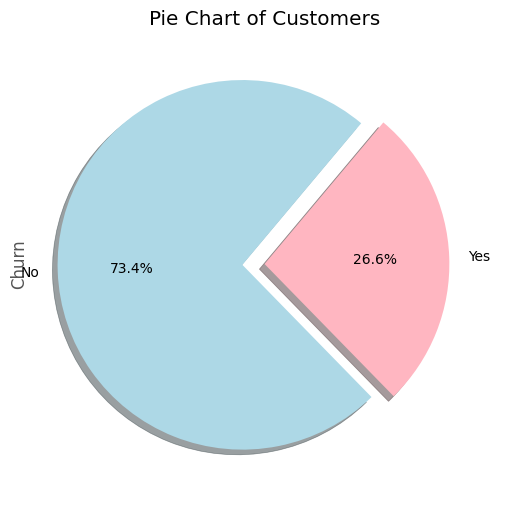

In [ ]:
data['Churn'].value_counts().plot(kind='pie', figsize=(10,6),
                                 autopct="%1.1f%%", startangle=50,shadow=True,
                                 labels=['No', 'Yes'], colors=['lightblue', 'lightpink'],
                                 explode=[0.12,0])
plt.title("Pie Chart of Customers")
plt.show()

For the telecom companies the average churn rate is 30-35%, here is it a bit less but it can further be reduced

In [ ]:
#Creating df of churned customers for further exploration.

churned_df=data[data['Churn']=='Yes']
churned_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
churned_df['TotalCharges'] = churned_df['TotalCharges'].replace(' ', '')
churned_df['TotalCharges'] = pd.to_numeric(churned_df['TotalCharges'])

<ipython-input-79-236f2301ac01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['TotalCharges'] = churned_df['TotalCharges'].replace(' ', '')
<ipython-input-79-236f2301ac01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['TotalCharges'] = pd.to_numeric(churned_df['TotalCharges'])


<ipython-input-80-1557a0c6304e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Churn', ylabel='tenure'>

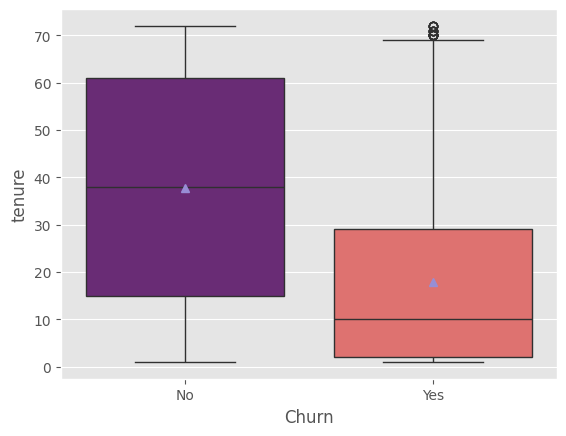

In [ ]:
#Visualizing different features to understand relationship with Target Variable

sns.boxplot(
    x = data['Churn'],
    y = data["tenure"],
    showmeans=True,  # Display mean as a marker
    data=data,
    palette='magma'
)

As the visual represents, the average tenture of churning customers is 20 years, but it is also clear from the visual that company does have loyal customers with much longer tenure.

In [ ]:
contract_churn_count=churned_df.groupby(['Contract'])['Churn'].value_counts().reset_index(name='counts')
contract_churn_count

,Contract,Churn,counts
0,Month-to-month,Yes,1655
1,One year,Yes,166
2,Two year,Yes,48


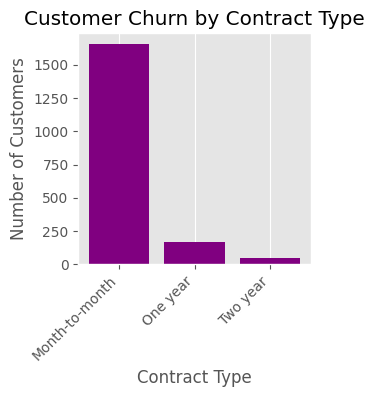

In [ ]:
plt.figure(figsize=(3, 3))
plt.bar(contract_churn_count['Contract'], contract_churn_count['counts'], color='purple')
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Customer Churn by Contract Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.show()

As it can be seen in this visual, M2M contract type has the highest churn count

In [ ]:
int_serv_churn_count=churned_df.groupby(['InternetService'])['Churn'].value_counts().reset_index(name='counts')
int_serv_churn_count

,InternetService,Churn,counts
0,DSL,Yes,459
1,Fiber optic,Yes,1297
2,No,Yes,113


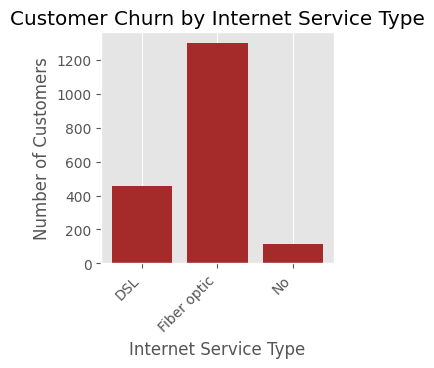

In [ ]:
plt.figure(figsize=(3, 3))
plt.bar(int_serv_churn_count['InternetService'], int_serv_churn_count['counts'], color='brown')
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.title("Customer Churn by Internet Service Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.show()

As it can be seen in this visual, Fiber optic has the highest churn count

In [ ]:
# Replace specific string values with numerical values for accurate calculations
data['Churn'] = data['Churn'].replace(['No', 'Yes'], [0,1 ])


churn_rate_by_gender = (data.groupby(['gender'])['Churn'].mean() * 100).reset_index(name='Churn %')
print(churn_rate_by_gender)

   gender    Churn %
0  Female  26.959518
1    Male  26.204565


In [ ]:
count_male_churned = 0
count_female_churned = 0

for index, row in churned_df.iterrows():
    if row['gender'] == "Male":
        count_male_churned += 1
    elif row['gender'] == "Female":
        count_female_churned += 1

print("Male Customers who churned:", count_male_churned)
print("Female Customers who churned:", count_female_churned)

Male Customers who churned: 930
Female Customers who churned: 939


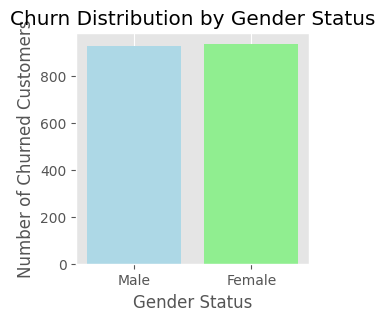

In [ ]:
male_labels = ["Male"]
female_labels = ["Female"]
counts = [count_male_churned, count_female_churned]

plt.figure(figsize=(3, 3))
plt.bar(male_labels + female_labels, counts, color=['lightblue', 'lightgreen'])
plt.xlabel("Gender Status")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Distribution by Gender Status")
plt.grid(axis='y')
plt.show()

As it can be seen, Gender has no effect on churn count as they both are almost silimar

In [ ]:
count_is_senior = 0
count_not_senior = 0

for index, row in churned_df.iterrows():
    if row['SeniorCitizen'] == 1:
        count_is_senior += 1
    else:
        count_not_senior += 1

print("Senior Citizens who churned:", count_is_senior)
print("Non-Senior Citizens who churned:", count_not_senior)

Senior Citizens who churned: 476
Non-Senior Citizens who churned: 1393


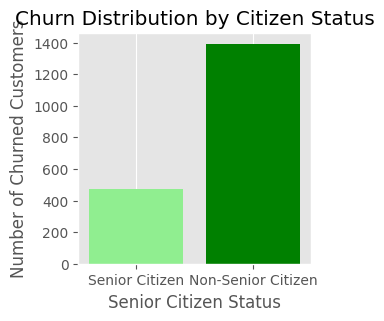

In [ ]:

senior_citizen_labels = ["Senior Citizen"]
non_senior_citizen_labels = ["Non-Senior Citizen"]
counts = [count_is_senior, count_not_senior]

plt.figure(figsize=(3, 3))
plt.bar(senior_citizen_labels + non_senior_citizen_labels, counts, color=['lightgreen', 'green'])
plt.xlabel("Senior Citizen Status")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Distribution by Citizen Status")
plt.grid(axis='y')
plt.show()

So from the visual it can be seen, Non-senior citizen are churning more.

In [ ]:
from collections import defaultdict  # For efficient counting by payment method

payment_method_counts = defaultdict(int)  # Dictionary to store counts

for index, row in churned_df.iterrows():
    payment_method = row['PaymentMethod']
    payment_method_counts[payment_method] += 1

for payment_method, count in payment_method_counts.items():
    print(f"{payment_method} Customers who churned:", count)

Mailed check Customers who churned: 308
Electronic check Customers who churned: 1071
Bank transfer (automatic) Customers who churned: 258
Credit card (automatic) Customers who churned: 232


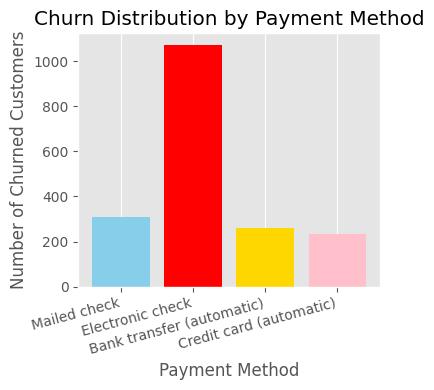

In [ ]:
# Extract payment method labels and counts directly
payment_methods = list(payment_method_counts.keys())
counts = list(payment_method_counts.values())

plt.figure(figsize=(4,4))
plt.bar(payment_methods, counts, color=['skyblue', 'red', 'gold', 'pink'])
plt.xlabel("Payment Method")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Distribution by Payment Method")
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As the visual clearly depicting, "Electronic Check" Method has the most churned customers

In [ ]:
count_multiple_lines_churned = 0
count_single_line_churned = 0
count_no_line_churned = 0
for index, row in churned_df.iterrows():
    multiple_lines = row['MultipleLines']
    if multiple_lines == "Yes":
        count_multiple_lines_churned += 1
    elif multiple_lines == "No":
        count_single_line_churned += 1
    elif multiple_lines == "No phone service":
        count_no_line_churned +=1
    else:
        # Handle cases where MultipleLines value is not expected
        print(f"Warning: Unexpected MultipleLines value: {multiple_lines}")

print("Customers with Multiple Lines who churned:", count_multiple_lines_churned)
print("Customers with Single Line who churned:", count_single_line_churned)
print("Customers with No Line who churned:", count_no_line_churned)

Customers with Multiple Lines who churned: 850
Customers with Single Line who churned: 849
Customers with No Line who churned: 170


So, Both Multiple and Single line churn count is same.

In [ ]:
count_partner_churned = 0
count_no_partner_churned = 0

for index, row in churned_df.iterrows():
    if row['Partner'] == "Yes":
        count_partner_churned += 1
    elif row['Partner'] == "No":
        count_no_partner_churned += 1
    else:
        # Handle cases where Partner value is not "Yes" or "No"
        print(f"Warning: Unexpected Partner value: {row['Partner']}")

print("Customers with Partner who churned:", count_partner_churned)
print("Customers without Partner who churned:", count_no_partner_churned)

Customers with Partner who churned: 669
Customers without Partner who churned: 1200


In [ ]:
count_dependents_churned = 0
count_no_dependents_churned = 0

for index, row in churned_df.iterrows():
    if row['Dependents'] == "Yes":
        count_dependents_churned += 1
    elif row['Dependents'] == "No":
        count_no_dependents_churned += 1
    else:
        # Handle cases where Dependents value is not "Yes" or "No"
        print(f"Warning: Unexpected Dependents value: {row['Dependents']}")

print("Customers with Dependents who churned:", count_dependents_churned)
print("Customers without Dependents who churned:", count_no_dependents_churned)

Customers with Dependents who churned: 326
Customers without Dependents who churned: 1543


In [ ]:
count_phone_service_churned = 0
count_no_phone_service_churned = 0
count_other_phone_service = 0  # For "No phone service" or other values

for index, row in churned_df.iterrows():
    phone_service = row['PhoneService']
    if phone_service == "Yes":
        count_phone_service_churned += 1
    elif phone_service == "No":
        count_no_phone_service_churned += 1
    else:
        count_other_phone_service += 1

print("Customers with Phone Service who churned:", count_phone_service_churned)
print("Customers with No Phone Service who churned:", count_no_phone_service_churned)


Customers with Phone Service who churned: 1699
Customers with No Phone Service who churned: 170


In [ ]:
count_online_security_churned = 0
count_no_online_security_churned = 0

for index, row in churned_df.iterrows():
    online_security = row['OnlineSecurity']
    if online_security == "Yes":
        count_online_security_churned += 1
    else:
        count_no_online_security_churned += 1

print("Customers with Online Security who churned:", count_online_security_churned)
print("Customers with No Online Security who churned:", count_no_online_security_churned)

Customers with Online Security who churned: 295
Customers with No Online Security who churned: 1574


In [ ]:
count_online_backup_churned = 0
count_no_online_backup_churned = 0

for index, row in churned_df.iterrows():
    online_backup = row['OnlineBackup']
    if online_backup == "Yes":
        count_online_backup_churned += 1
    else:
        count_no_online_backup_churned += 1

print("Customers with Online backup who churned:", count_online_backup_churned)
print("Customers with No Online backup who churned:", count_no_online_backup_churned)

Customers with Online backup who churned: 523
Customers with No Online backup who churned: 1346


In [ ]:
count_device_protection_churned = 0
count_no_device_protection_churned = 0

for index, row in churned_df.iterrows():
    device_protection = row['DeviceProtection']
    if device_protection == "Yes":
        count_device_protection_churned += 1
    else:
        count_no_device_protection_churned += 1

print("Customers with Device Protection who churned:", count_device_protection_churned)
print("Customers with No Device Protection who churned:", count_no_device_protection_churned)

Customers with Device Protection who churned: 545
Customers with No Device Protection who churned: 1324


In [ ]:
count_tech_support_churned = 0
count_no_tech_support_churned = 0

for index, row in churned_df.iterrows():
    tech_support = row['TechSupport']
    if tech_support == "Yes":
        count_tech_support_churned += 1
    else:
        count_no_tech_support_churned += 1

print("Customers with Tech Support who churned:", count_tech_support_churned)
print("Customers with No Tech Support who churned:", count_no_tech_support_churned)

Customers with Tech Support who churned: 310
Customers with No Tech Support who churned: 1559


In [ ]:
count_streaming_tv_churned = 0
count_no_streaming_tv_churned = 0
count_streaming_movies_churned = 0
count_no_streaming_movies_churned = 0

for index, row in churned_df.iterrows():
    streaming_tv = row['StreamingTV']
    streaming_movies = row['StreamingMovies']

    if streaming_tv == "Yes":
        count_streaming_tv_churned += 1
    else:
        count_no_streaming_tv_churned += 1

    if streaming_movies == "Yes":
        count_streaming_movies_churned += 1
    else:
        count_no_streaming_movies_churned += 1

print("Customers with Streaming TV who churned:", count_streaming_tv_churned)
print("Customers with No Streaming TV who churned:", count_no_streaming_tv_churned)
print("Customers with Streaming Movies who churned:", count_streaming_movies_churned)
print("Customers with No Streaming Movies who churned:", count_no_streaming_movies_churned)

Customers with Streaming TV who churned: 814
Customers with No Streaming TV who churned: 1055
Customers with Streaming Movies who churned: 818
Customers with No Streaming Movies who churned: 1051


In [ ]:
count_paperless_billing_churned = 0
count_no_paperless_billing_churned = 0

for index, row in churned_df.iterrows():
    paperless_billing = row['PaperlessBilling']

    if paperless_billing == "Yes":
        count_paperless_billing_churned += 1
    else:
        count_no_paperless_billing_churned += 1

print("Customers with Paperless Billing who churned:", count_paperless_billing_churned)
print("Customers with No Paperless Billing who churned:", count_no_paperless_billing_churned)

Customers with Paperless Billing who churned: 1400
Customers with No Paperless Billing who churned: 469


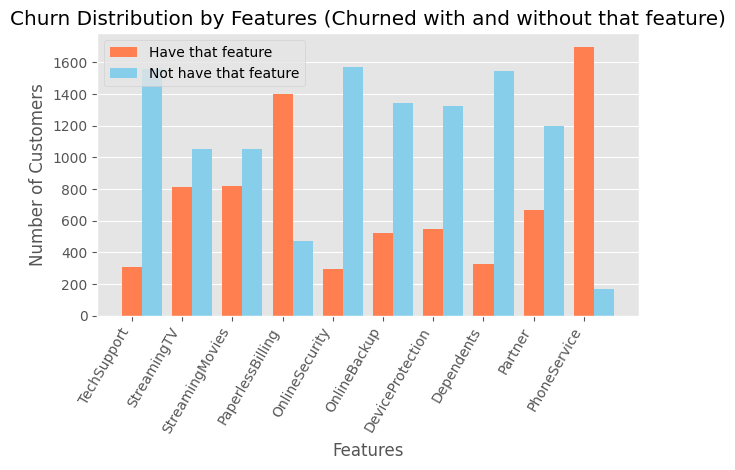

In [ ]:
features = [churned_df["TechSupport"],churned_df["StreamingTV"],churned_df["StreamingMovies"],
            churned_df["PaperlessBilling"],churned_df["OnlineSecurity"],churned_df["OnlineBackup"],
            churned_df["DeviceProtection"],churned_df["Dependents"],churned_df["Partner"],churned_df["PhoneService"]]


churn_counts = [count_tech_support_churned, count_streaming_tv_churned, count_streaming_movies_churned,
                count_paperless_billing_churned, count_online_security_churned, count_online_backup_churned,
                count_device_protection_churned, count_dependents_churned, count_partner_churned,
                count_phone_service_churned]
not_churned_counts = [count_no_tech_support_churned, count_no_streaming_tv_churned,
                      count_no_streaming_movies_churned, count_no_paperless_billing_churned,
                      count_no_online_security_churned,count_no_online_backup_churned,
                      count_no_device_protection_churned,count_no_dependents_churned,
                      count_no_partner_churned,count_no_phone_service_churned]

x = range(len(features))
bar_width = 0.4

plt.bar(x, churn_counts, bar_width, label='Have that feature', color='coral')
plt.bar([p + bar_width for p in x], not_churned_counts, bar_width, label='Not have that feature', color='skyblue')
plt.xlabel("Features")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution by Features (Churned with and without that feature)")
plt.xticks(x, ['TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'OnlineSecurity','OnlineBackup',
               'DeviceProtection','Dependents','Partner','PhoneService'],rotation=60, ha='right')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()

plt.show()

In [ ]:
churned_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [ ]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churned_df['TotalCharges'].unique()

array([ 108.15,  151.65,  820.5 , ...,   75.75, 6886.25,  306.6 ])

In [ ]:
overall_avg_monthly = data['MonthlyCharges'].mean()
overall_avg_totally = data['TotalCharges'].mean()
overall_avg_monthly
overall_avg_totally
print("Overall Monthly Average:", round(overall_avg_monthly,2) )
print("Overall Total Charges Average:", round(overall_avg_totally,2) )

Overall Monthly Average: 64.8
Overall Total Charges Average: 2283.3


In [ ]:

churned_avg_monthly = churned_df['MonthlyCharges'].mean()
churned_avg_totally = churned_df['TotalCharges'].mean()
churned_avg_monthly
churned_avg_totally
print("Churned customers Monthly Average:", round(churned_avg_monthly,2) )
print("Churned customers Total Charges Average:", round(churned_avg_totally,2) )


Churned customers Monthly Average: 74.44
Churned customers Total Charges Average: 1531.8


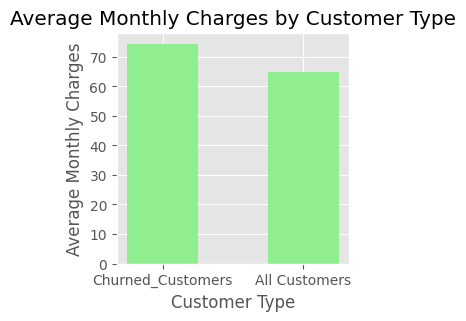

In [ ]:
customer_type = ['Churned_Customers', 'All Customers']
monthly_avg = [churned_avg_monthly,overall_avg_monthly]
plt.figure(figsize=(3, 3))
plt.bar(customer_type, monthly_avg,width=0.5, color='lightgreen')
plt.xlabel('Customer Type')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Customer Type')
plt.show()

[Text(0.5, 0, 'Contract')]

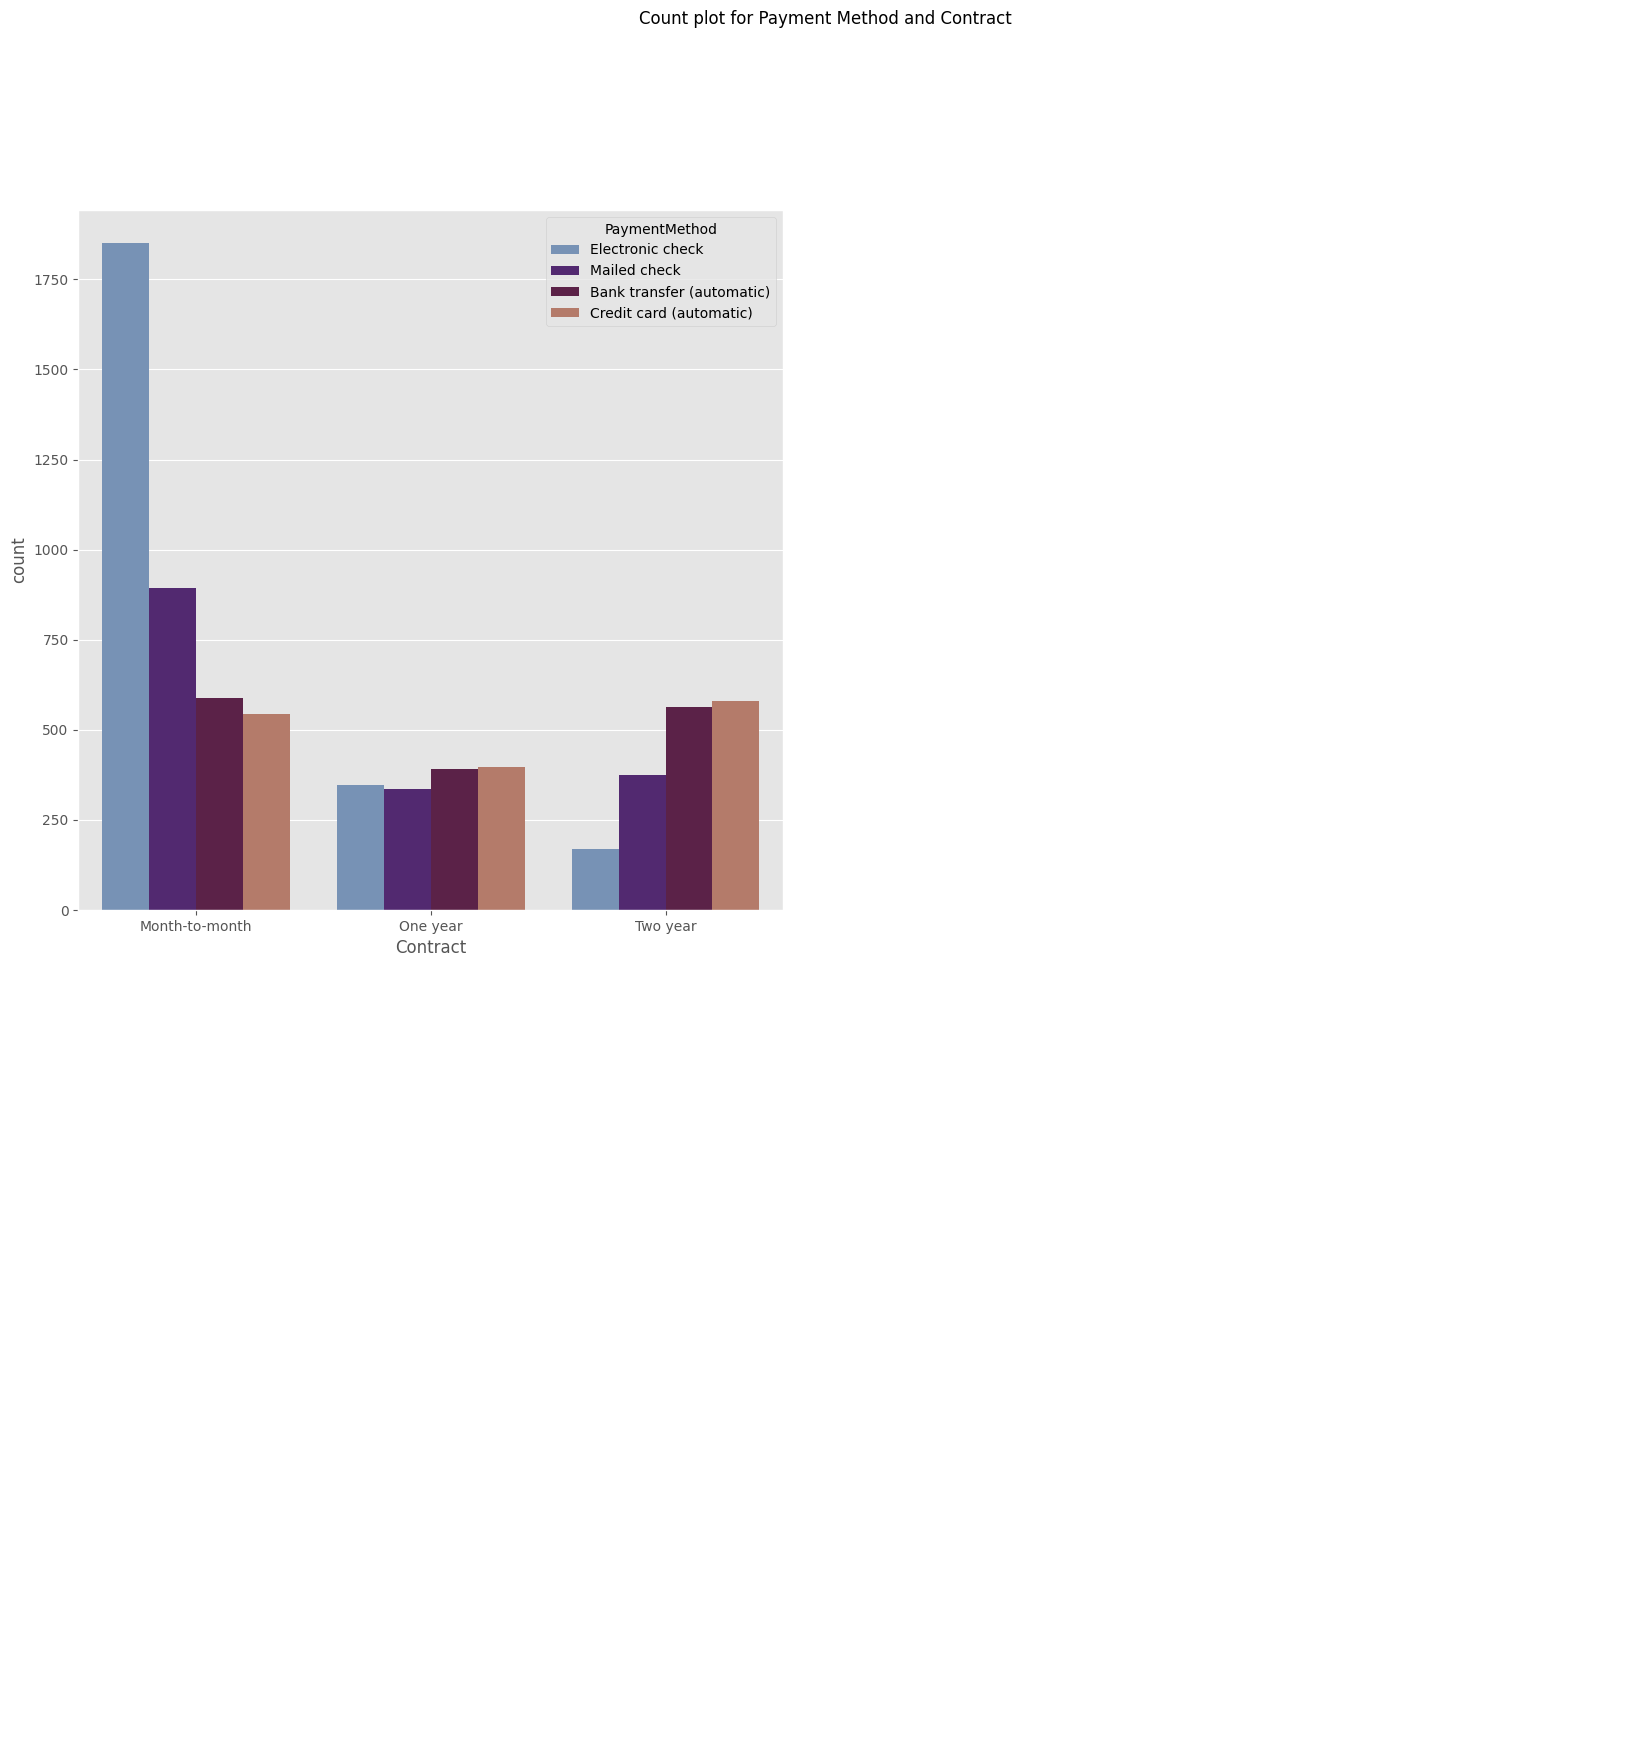

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20,20))
ax[1, 1].axis('off')
ax[1, 0].axis('off')
ax[0, 1].axis('off')
plt.suptitle('Count plot for Payment Method and Contract ')

ax = sns.countplot(x ='Contract', data= data, hue= 'PaymentMethod', ax= ax[0, 0], palette='twilight')
ax.set(xlabel = 'Contract')


As It can be seen, M2M contract type with Electronic mail has the highest churn count.

### 3. Feature Engineering

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# Replace specific string values with numerical values for accurate calculations

data['PhoneService'] = data['PhoneService'].replace(['No', 'Yes'], [0,1 ])
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No', 'Yes'], [0,1 ])
data['TechSupport'] = data['TechSupport'].replace(['No', 'Yes'], [0,1 ])
data['StreamingTV'] = data['StreamingTV'].replace(['No', 'Yes'], [0,1 ])
data['StreamingMovies'] = data['StreamingMovies'].replace(['No', 'Yes'], [0,1 ])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,0,Yes,No,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,1,No,Yes,0,0,0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,1,Yes,No,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,1,No,Yes,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,0,No,No,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
data['Has_Bundled_Services'] = np.where((data['PhoneService'] == 1) & (data['OnlineSecurity'] == 1) &
                                        (data['TechSupport'] == 1) & (data['StreamingTV'] == 1) &
                                        (data['StreamingMovies'] == 1), 1, 0)

# Analyze churn patterns by bundled services
churn_by_bundle = data.groupby('Has_Bundled_Services')['Churn'].mean()
print(churn_by_bundle)

Has_Bundled_Services
0    0.277110
1    0.102845
Name: Churn, dtype: float64


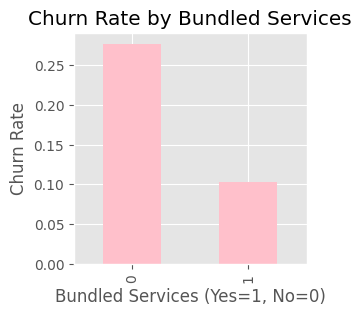

In [ ]:
plt.figure(figsize=(3, 3))
churn_by_bundle.plot(kind='bar', color='pink')
plt.xlabel('Bundled Services (Yes=1, No=0)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Bundled Services')
plt.show()

As It can be seen, The Churn rate for Bundled Services is less than those with no bundled services.

In [ ]:
# Analyze churn patterns by total contract value(TCV)

data['TotalContractValue'] = data['tenure'] * data['MonthlyCharges']
churn_by_value = data.groupby('TotalContractValue')['Churn'].mean()
print("Churn Rate by Total Contract Value:")
for value, churn_rate in churn_by_value.items():
  if value == 0:
    print(f"\tTotal Contract Value: ${value:.2f} (no charges) - No churn (churn rate = {churn_rate:.2f})")
  else:
    print(f"\tTotal Contract Value: ${value:.2f} - Churn rate = {churn_rate:.2f}%")

Streaming output truncated to the last 5000 lines.
	Total Contract Value: $306.75 - Churn rate = 0.00%
	Total Contract Value: $307.30 - Churn rate = 0.00%
	Total Contract Value: $308.00 - Churn rate = 0.00%
	Total Contract Value: $308.25 - Churn rate = 0.00%
	Total Contract Value: $308.80 - Churn rate = 0.00%
	Total Contract Value: $309.60 - Churn rate = 0.00%
	Total Contract Value: $309.75 - Churn rate = 0.00%
	Total Contract Value: $310.70 - Churn rate = 1.00%
	Total Contract Value: $310.80 - Churn rate = 0.00%
	Total Contract Value: $311.40 - Churn rate = 1.00%
	Total Contract Value: $311.80 - Churn rate = 1.00%
	Total Contract Value: $312.30 - Churn rate = 1.00%
	Total Contract Value: $312.55 - Churn rate = 0.00%
	Total Contract Value: $313.25 - Churn rate = 0.00%
	Total Contract Value: $313.60 - Churn rate = 0.00%
	Total Contract Value: $313.80 - Churn rate = 1.00%
	Total Contract Value: $315.00 - Churn rate = 1.00%
	Total Contract Value: $315.20 - Churn rate = 0.50%
	Total Contra

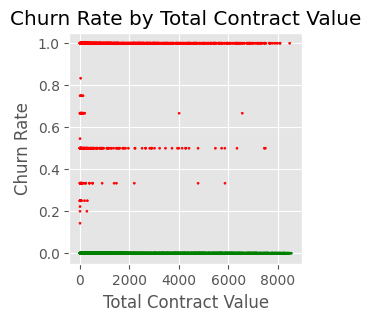

In [ ]:
contract_values = churn_by_value.index.to_numpy()  # Extract contract values
churn_rates = churn_by_value.to_numpy()  # Extract churn rates

colors = [('green' if val == 0 else 'red') for val in churn_rates]
marker_size = 2
plt.figure(figsize=(3, 3))
plt.scatter(contract_values, churn_rates, c=colors, s=marker_size)
plt.xlabel('Total Contract Value')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Total Contract Value')
plt.show()

In [ ]:
value_bins = pd.cut(data['TotalContractValue'], bins=3, labels=['Low', 'Medium', 'High'])
churn_by_range = data.groupby(value_bins)['Churn'].mean().reset_index()
print("Average Churn Rate by Total Contract Value Range:")
churn_by_range

Average Churn Rate by Total Contract Value Range:


,TotalContractValue,Churn
0,Low,0.315823
1,Medium,0.181818
2,High,0.125000


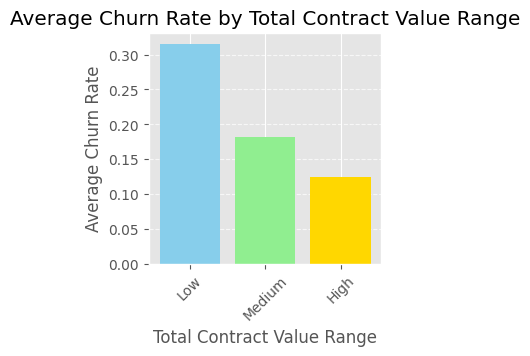

In [ ]:
plt.figure(figsize=(3, 3))
plt.bar(churn_by_range['TotalContractValue'], churn_by_range['Churn'], color=['skyblue', 'lightgreen', 'gold'])
plt.xlabel('Total Contract Value Range')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Total Contract Value Range')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Low TCV have highest churn rate.

In [ ]:
tcv_corr = data['Churn'].corr(data['TotalContractValue'])
print("Correlation between Churn and Total Contract Value:", round(tcv_corr,5))
tenure_corr = data['Churn'].corr(data['tenure'])
print("Correlation between Churn and tenure:", round(tenure_corr,5))
mc_corr = data['Churn'].corr(data['MonthlyCharges'])
print("Correlation between Churn and Monthly Charges:", round(mc_corr,5))
tc_corr = data['Churn'].corr(data['TotalCharges'])
print("Correlation between Churn and Total Charges:", round(tc_corr,5))

Correlation between Churn and Total Contract Value: -0.19968
Correlation between Churn and tenure: -0.35405
Correlation between Churn and Monthly Charges: 0.19286
Correlation between Churn and Total Charges: -0.19948


As stated, The correlation coefficient between Churn and Total Contract Value is weak and negative (-0.19968). This suggests a very slight tendency for customers with higher TCV to churn less.



The correlation coefficient  Churn and tenure is moderate and negative (-0.35405). This indicates a clearer trend: customers with longer tenure tend to churn less. This suggests that building customer loyalty over time can help reduce churn.

The correlation coefficient Churn and Monthly Charges is weak and positive (0.19286). This suggests a very slight tendency for customers with higher monthly charges to churn more.

The correlation coefficient is  Churn and Total Charges weak and negative (-0.19948). This is very similar to the TCV correlation, suggesting a very slight tendency for customers with higher total charges to churn less.

In [ ]:
#dropping 'Gender' and 'CustomerID' columns as they do not have any effect on 'Churn'

data= data.drop(['gender','customerID'], axis=1)

In [ ]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_Bundled_Services,TotalContractValue
0,0,Yes,No,1,0,No phone service,DSL,0,Yes,No,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,29.85
1,0,No,No,34,1,No,DSL,1,No,Yes,0,0,0,One year,No,Mailed check,56.95,1889.50,0,0,1936.30
2,0,No,No,2,1,No,DSL,1,Yes,No,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,107.70
3,0,No,No,45,0,No phone service,DSL,1,No,Yes,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1903.50
4,0,No,No,2,1,No,Fiber optic,0,No,No,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,141.40


## 4. Data Preprocessing
### Data Encoding and Scaling

In [ ]:
#Reverting all the converted features
data['PhoneService'] = data['PhoneService'].replace([0, 1], ['No','Yes' ])
data['OnlineSecurity'] = data['OnlineSecurity'].replace([0, 1], ['No','Yes' ])
data['TechSupport'] = data['TechSupport'].replace([0, 1], ['No','Yes' ])
data['StreamingTV'] = data['StreamingTV'].replace([0, 1], ['No','Yes' ])
data['StreamingMovies'] = data['StreamingMovies'].replace([0, 1], ['No','Yes' ])

In [ ]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_Bundled_Services,TotalContractValue
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,29.85
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,1936.30
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,107.70
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1903.50
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,141.40


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate categorical and numerical features
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalContractValue']

other_features = ['Churn','Has_Bundled_Services']

# One-hot encode categorical features
ohe = OneHotEncoder(sparse=False)
encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine encoded categorical features with scaled numerical features
data= pd.concat([data[numerical_features], encoded_data, data[other_features]], axis=1)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


print(data)

        tenure  MonthlyCharges  TotalCharges  TotalContractValue  \
0    -1.280248       -1.161694     -0.994194           -0.995034   
1     0.064303       -0.260878     -0.173740           -0.153164   
2    -1.239504       -0.363923     -0.959649           -0.960656   
3     0.512486       -0.747850     -0.195248           -0.167649   
4    -1.239504        0.196178     -0.940457           -0.945775   
...        ...             ...           ...                 ...   
7038 -0.343137        0.664868     -0.129180           -0.109491   
7039  1.612573        1.276493      2.241056            2.272977   
7040 -0.872808       -1.170004     -0.854514           -0.864434   
7041 -1.158016        0.319168     -0.872095           -0.876798   
7042  1.368109        1.357932      2.012344            2.070950   

      SeniorCitizen  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0                 0            1               0                 0   
1                 0            0           

In [ ]:
data.head()

,tenure,MonthlyCharges,TotalCharges,TotalContractValue,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Has_Bundled_Services
0,-1.280248,-1.161694,-0.994194,-0.995034,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0.064303,-0.260878,-0.173740,-0.153164,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,-1.239504,-0.363923,-0.959649,-0.960656,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,0.512486,-0.747850,-0.195248,-0.167649,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,-0.945775,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


#### Checking distribution of target variable

In [ ]:
target = 'Churn'


class_counts = data[target].value_counts().sort_values(ascending=False)


print("Class frequencies:")
print(class_counts)

if len(class_counts) > 2:
    majority_class = class_counts.iloc[0]
    minority_class = class_counts.iloc[-1]
    imbalance_ratio = majority_class / minority_class
    print(f"\nImbalance Ratio (Majority / Minority): {imbalance_ratio:.2f}")
else:
    majority_class = max(class_counts.values)
    minority_class = min(class_counts.values)
    imbalance_ratio = majority_class / minority_class
    print(f"\nImbalance Ratio (Positive / Negative): {imbalance_ratio:.2f}")

Class frequencies:
0    5163
1    1869
Name: Churn, dtype: int64

Imbalance Ratio (Positive / Negative): 2.76


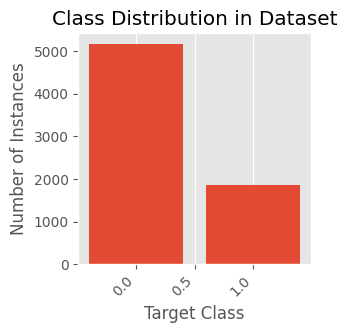

In [ ]:
class_labels = class_counts.index.to_numpy()
class_values = class_counts.to_numpy()


plt.figure(figsize=(3, 3))
plt.bar(class_labels, class_values)
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The Target class is highly unbalanced, so we'll apply SMOTE to balance it

### Spliting data before Model development

In [ ]:
x=data.drop(['Churn'],axis=1)

In [ ]:
y=data['Churn']

In [ ]:
x

,tenure,MonthlyCharges,TotalCharges,TotalContractValue,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Has_Bundled_Services
0,-1.280248,-1.161694,-0.994194,-0.995034,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.064303,-0.260878,-0.173740,-0.153164,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-1.239504,-0.363923,-0.959649,-0.960656,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.512486,-0.747850,-0.195248,-0.167649,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,-0.945775,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,0.664868,-0.129180,-0.109491,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1
7039,1.612573,1.276493,2.241056,2.272977,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,-0.872808,-1.170004,-0.854514,-0.864434,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,-1.158016,0.319168,-0.872095,-0.876798,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



print("Training set shapes:")
print(X_train.shape, y_train.shape)

print("Testing set shapes:")
print(X_test.shape, y_test.shape)

Training set shapes:
(5625, 31) (5625,)
Testing set shapes:
(1407, 31) (1407,)


## 5. Model Development
### (of Unbalanced Dataset)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lg = LogisticRegression()

lg.fit(X_train, y_train)

lg_y_pred = lg.predict(X_test)

lg_accuracy = accuracy_score(y_test, lg_y_pred)
lg_precision = precision_score(y_test, lg_y_pred)
lg_recall = recall_score(y_test, lg_y_pred)
lg_f1 = f1_score(y_test, lg_y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy: {lg_accuracy:.4f}")
print(f"Precision: {lg_precision:.4f}")
print(f"Recall: {lg_recall:.4f}")
print(f"F1-score: {lg_f1:.4f}")

Logistic Regression Performance:
Accuracy: 0.7875
Precision: 0.6190
Recall: 0.5214
F1-score: 0.5660


### 2. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print("\nSVM Model Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")


SVM Model Performance:
Accuracy: 0.7875
Precision: 0.6437
Recall: 0.4492
F1-score: 0.5291


### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

dtree_y_pred = dtree.predict(X_test)

dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
dtree_precision = precision_score(y_test, dtree_y_pred)
dtree_recall = recall_score(y_test, dtree_y_pred)
dtree_f1 = f1_score(y_test, dtree_y_pred)

print("Decision Tree Model Performance:")
print(f"Accuracy: {dtree_accuracy:.4f}")
print(f"Precision: {dtree_precision:.4f}")
print(f"Recall: {dtree_recall:.4f}")
print(f"F1-score: {dtree_f1:.4f}")

Decision Tree Model Performance:
Accuracy: 0.7321
Precision: 0.4960
Recall: 0.4920
F1-score: 0.4940


### 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")

Random Forest Model Performance:
Accuracy: 0.7882
Precision: 0.6348
Recall: 0.4786
F1-score: 0.5457


### 5. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier(objective='binary:logistic')

xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("XGBoost Model Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")

XGBoost Model Performance:
Accuracy: 0.7783
Precision: 0.5994
Recall: 0.5000
F1-score: 0.5452


### Balancing Dataset via SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

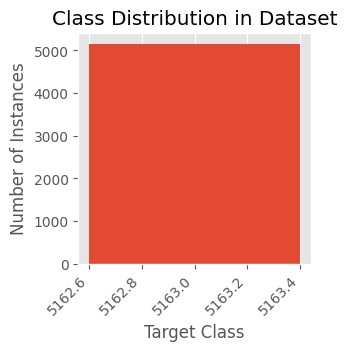

In [ ]:
balanced_0=5163
balanced_1=5163

plt.figure(figsize=(3, 3))
plt.bar(balanced_0,balanced_1)
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#### Spliting and Training model on resampled dataset

In [ ]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(x_res,y_res, test_size=0.2, random_state=42)



print("Training set shapes:")
print(X_res_train.shape, y_res_train.shape)

print("Testing set shapes:")
print(X_res_test.shape, y_res_test.shape)

Training set shapes:
(8260, 31) (8260,)
Testing set shapes:
(2066, 31) (2066,)


### 1. Logistic Regression

In [ ]:
lg.fit(X_res_train, y_res_train)

lg_y_res_pred = lg.predict(X_res_test)

lg_res_accuracy = accuracy_score(y_res_test, lg_y_res_pred)
lg_res_precision = precision_score(y_res_test, lg_y_res_pred)
lg_res_recall = recall_score(y_res_test, lg_y_res_pred)
lg_res_f1 = f1_score(y_res_test, lg_y_res_pred)

print("Logistic Regression Performance after balancing:")
print(f"Accuracy: {lg_res_accuracy:.4f}")
print(f"Precision: {lg_res_precision:.4f}")
print(f"Recall: {lg_res_recall:.4f}")
print(f"F1-score: {lg_res_f1:.4f}")

Logistic Regression Performance after balancing:
Accuracy: 0.8011
Precision: 0.7866
Recall: 0.8241
F1-score: 0.8049


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. SVM

In [ ]:
svm.fit(X_res_train, y_res_train)

svm_y_res_pred = svm.predict(X_res_test)

svm_res_accuracy = accuracy_score(y_res_test, svm_y_res_pred)
svm_res_precision = precision_score(y_res_test, svm_y_res_pred)
svm_res_recall = recall_score(y_res_test, svm_y_res_pred)
svm_res_f1 = f1_score(y_res_test, svm_y_res_pred)

print("SVM Performance after balancing:")
print(f"Accuracy: {svm_res_accuracy:.4f}")
print(f"Precision: {svm_res_precision:.4f}")
print(f"Recall: {svm_res_recall:.4f}")
print(f"F1-score: {svm_res_f1:.4f}")

SVM Performance after balancing:
Accuracy: 0.7977
Precision: 0.7842
Recall: 0.8192
F1-score: 0.8013


### 3. Decision Tree

In [ ]:
dtree.fit(X_res_train, y_res_train)

dtree_y_res_pred = dtree.predict(X_res_test)

dtree_res_accuracy = accuracy_score(y_res_test, dtree_y_res_pred)
dtree_res_precision = precision_score(y_res_test, dtree_y_res_pred)
dtree_res_recall = recall_score(y_res_test, dtree_y_res_pred)
dtree_res_f1 = f1_score(y_res_test, dtree_y_res_pred)

print("SVM Performance after balancing:")
print(f"Accuracy: {dtree_res_accuracy:.4f}")
print(f"Precision: {dtree_res_precision:.4f}")
print(f"Recall: {dtree_res_recall:.4f}")
print(f"F1-score: {dtree_res_f1:.4f}")

SVM Performance after balancing:
Accuracy: 0.7769
Precision: 0.7669
Recall: 0.7930
F1-score: 0.7797


### 4. Random Forest

In [ ]:
rf.fit(X_res_train, y_res_train)

rf_y_res_pred = rf.predict(X_res_test)

rf_res_accuracy = accuracy_score(y_res_test, rf_y_res_pred)
rf_res_precision = precision_score(y_res_test, rf_y_res_pred)
rf_res_recall = recall_score(y_res_test, rf_y_res_pred)
rf_res_f1 = f1_score(y_res_test, rf_y_res_pred)

print("SVM Performance after balancing:")
print(f"Accuracy: {rf_res_accuracy:.4f}")
print(f"Precision: {rf_res_precision:.4f}")
print(f"Recall: {rf_res_recall:.4f}")
print(f"F1-score: {rf_res_f1:.4f}")

SVM Performance after balancing:
Accuracy: 0.8306
Precision: 0.8170
Recall: 0.8503
F1-score: 0.8333


### 5. XGBoost

In [ ]:
xgb.fit(X_res_train, y_res_train)

xgb_y_res_pred = xgb.predict(X_res_test)

xgb_res_accuracy = accuracy_score(y_res_test, xgb_y_res_pred)
xgb_res_precision = precision_score(y_res_test, xgb_y_res_pred)
xgb_res_recall = recall_score(y_res_test, xgb_y_res_pred)
xgb_res_f1 = f1_score(y_res_test, xgb_y_res_pred)

print("SVM Performance after balancing:")
print(f"Accuracy: {xgb_res_accuracy:.4f}")
print(f"Precision: {xgb_res_precision:.4f}")
print(f"Recall: {xgb_res_recall:.4f}")
print(f"F1-score: {xgb_res_f1:.4f}")

SVM Performance after balancing:
Accuracy: 0.8190
Precision: 0.8041
Recall: 0.8416
F1-score: 0.8224


In [ ]:
result_table_b4=pd.DataFrame({'Models':['LR','SVM','DT','RF','XGB'],
                              'Accuracy':[lg_accuracy,svm_accuracy,dtree_accuracy,rf_accuracy,xgb_accuracy],
                              'Precision':[lg_precision,svm_precision,dtree_precision,rf_precision,xgb_precision],
                              'Recall':[lg_recall,svm_recall,dtree_recall,rf_recall,xgb_recall],
                              'F1':[lg_f1,svm_f1,dtree_f1,rf_f1,xgb_f1]})
print("Models performance before SMOTE : ")
result_table_b4


Models performance before SMOTE : 


,Models,Accuracy,Precision,Recall,F1
0,LR,0.787491,0.619048,0.521390,0.566038
1,SVM,0.787491,0.643678,0.449198,0.529134
2,DT,0.730633,0.493404,0.500000,0.496680
3,RF,0.786070,0.631769,0.467914,0.537634
4,XGB,0.778252,0.599359,0.500000,0.545190


In [ ]:
result_table_after=pd.DataFrame({'Models':['LR','SVM','DT','RF','XGB'],
                              'Accuracy':[lg_res_accuracy,svm_res_accuracy,dtree_res_accuracy,rf_res_accuracy,xgb_res_accuracy],
                              'Precision':[lg_res_precision,svm_res_precision,dtree_res_precision,rf_res_precision,xgb_res_precision],
                              'Recall':[lg_res_recall,svm_res_recall,dtree_res_recall,rf_res_recall,xgb_res_recall],
                              'F1':[lg_res_f1,svm_res_f1,dtree_res_f1,rf_res_f1,xgb_res_f1]})
print("Models performance after SMOTE : ")
result_table_after

Models performance after SMOTE : 


,Models,Accuracy,Precision,Recall,F1
0,LR,0.801065,0.786642,0.824101,0.804936
1,SVM,0.797677,0.784186,0.819242,0.801331
2,DT,0.776864,0.766917,0.793003,0.779742
3,RF,0.830591,0.816993,0.850340,0.833333
4,XGB,0.818974,0.804085,0.841594,0.822412


### As it is obvious from the results, After balancing the dataset, our models performed much better

### Since Random Forest performed the best among all, but before choosing it as final model, we'll tune top 3 models to see if their results improve or not.

## 6. Model Evaluation

### Using GridSearchCV to tune models and get their best scores

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 100],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': rf,
        'params': {
            'n_estimators': [200, 300, 400, 500],
            'max_depth': [5, 10, 15, 20]
        }
    },
    'xgboost': {
        'model': xgb,
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.1, 0.01, 0.001],
            'max_depth': [5, 10, 15, 20]
        }
    }
}

In [ ]:
scores=[]

for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'], cv=5 , return_train_score=False)
  clf.fit(X_res_train, y_res_train)
  scores.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
after_cv_score=pd.DataFrame(scores,columns=['model','best_score','best_params'])
after_cv_score

,model,best_score,best_params
0,svm,0.806901,"{'C': 100, 'kernel': 'rbf'}"
1,random_forest,0.832567,"{'max_depth': 20, 'n_estimators': 500}"
2,xgboost,0.830630,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


## Using RandomizedSearchCV with Stratifed kfold


In [ ]:
from sklearn.model_selection import RandomizedSearchCV , StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
model_configs = {
    'svm': {
        'model': SVC(gamma='auto'),
        'param_dist': {
            'C': np.logspace(-4, 4, 10),
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': rf ,
        'param_dist': {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [4, 8, 16, 20, 32]
        }
    },
    'xgboost': {
        'model':xgb,
        'param_dist': {
            'learning_rate': [0.01, 0.1, 0.3],
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 8, 15, 20]
        }
    }
}


In [ ]:
scores_rs = []

for model_name, model_config in model_configs.items():
  clf = RandomizedSearchCV(model_config['model'], model_config['param_dist'], cv=kfold, scoring='roc_auc', n_iter=10)
  clf.fit(X_res_train, y_res_train)
  scores_rs.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
after_rs_score=pd.DataFrame(scores_rs,columns=['model','best_score','best_params'])
after_rs_score

,model,best_score,best_params
0,svm,0.890756,"{'kernel': 'rbf', 'C': 21.54434690031882}"
1,random_forest,0.907460,"{'n_estimators': 400, 'max_depth': 16}"
2,xgboost,0.907184,"{'n_estimators': 200, 'max_depth': 15, 'learni..."


#### After both GirdSearchCV and RandomizedSearchCV, Random Forest still performed the best with best_score of 0.9074. So, I'll use it as my final model.

## Checking if RF is overfitting, before finalizing it.

In [ ]:
X1_train, X1_val, y1_train, y1_val = train_test_split(x_res, y_res, test_size=0.2)

rf1= RandomForestClassifier(n_estimators=400, max_depth=16)
rf1.fit(X1_train, y1_train)

train_score_before = rf1.score(X1_train, y1_train)
val_score_before = rf1.score(X1_val, y1_val)


print("Training Score before:", train_score_before)
print("Validation Score before:", val_score_before)

Training Score before: 0.9771186440677966
Validation Score before: 0.8315585672797676


## The model is overfitting so tuning parameters to reduce the difference as much as possible.

In [ ]:
X1_train, X1_val, y1_train, y1_val = train_test_split(x_res, y_res, test_size=0.2)

rf1= RandomForestClassifier(n_estimators=400, max_depth=16 ,oob_score=True, min_samples_split=25)
rf1.fit(X1_train, y1_train)

train_score_after = rf1.score(X1_train, y1_train)
val_score_after = rf1.score(X1_val, y1_val)


print("Training Score After:", train_score_after)
print("Validation Score After:", val_score_after)


Training Score After: 0.865496368038741
Validation Score After: 0.8281703775411423


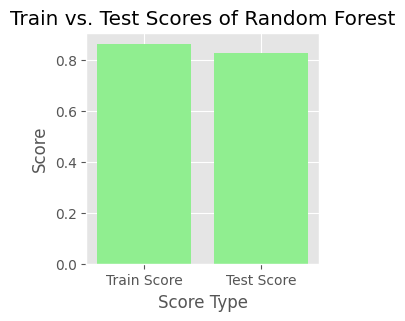

In [ ]:
train_score = 0.8654
val_score = 0.8281
scores = [train_score, val_score]
labels = ['Train Score', 'Test Score']

plt.figure(figsize=(3, 3))
plt.bar(labels, scores,color='lightgreen')
plt.title('Train vs. Test Scores of Random Forest')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()


## Now the difference is far more less than before.

#6. Finalizing Model

In [ ]:
#Finalizing model and training on whole data

random_forest=RandomForestClassifier(n_estimators=400, max_depth=16 ,oob_score=True, min_samples_split=25)

random_forest.fit(x_res,y_res)


RandomForestClassifier(max_depth=16, min_samples_split=25, n_estimators=400,
                       oob_score=True)

In [ ]:
#Saving the model

import joblib

joblib.dump(random_forest,'Churn_prediction_model')


['Churn_prediction_model']

In [ ]:
model=joblib.load('Churn_prediction_model')

# 7. Making Predictions

In [ ]:
x_res.head(5)


,tenure,MonthlyCharges,TotalCharges,TotalContractValue,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Has_Bundled_Services
0,-1.280248,-1.161694,-0.994194,-0.995034,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.064303,-0.260878,-0.173740,-0.153164,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-1.239504,-0.363923,-0.959649,-0.960656,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.512486,-0.747850,-0.195248,-0.167649,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,-0.945775,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


#### 1. The customer at index 8 **Churned[1]** but Would they have **Not churned[0]** is they had No Phone Service, No Fiber Optics Connection and other than M2M contract?  

In [ ]:
model.predict([[-0.180161,1.329677,0.336516,0.287587,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

#### 2. The customer at index 13 **Churned[1]** but Would they have **Not churned[0]** is they had a bundled service package?

In [ ]:
model.predict([[0.675462,1.293113,1.214589,1.235637,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

#### 3. The customer at index 26 **Churned[1]** but Would they have **Not churned[0]** is they had a bundled service package?

In [ ]:
model.predict([[0.593974,1.148517,1.087902,1.053768,0,1,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

# That's all from my side. Thanks for stopping by.
## For the presentation of this project, visit my Linkedin @bisma-azeem-qureshi
# Regards.
# Bisma Azeem